<h2>Set up</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
# !pip install imageio
import imageio
from IPython.display import HTML

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

In [3]:
np.random.seed(0)

<h2>Generate Data</h2>

In [4]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
data.shape, labels.shape

((1000, 2), (1000,))

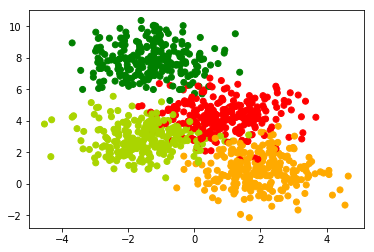

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=my_cmap)
plt.show()

In [6]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, stratify=labels, random_state=0,shuffle=True)
x_train.shape, x_val.shape

((750, 2), (250, 2))

In [7]:
enc = OneHotEncoder()
y_oh_train = enc.fit_transform(np.expand_dims(y_train,1)).toarray()
y_oh_val = enc.fit_transform(np.expand_dims(y_val, 1)).toarray()
y_oh_train.shape, y_oh_val.shape

/home/abcd/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/abcd/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "cate

((750, 4), (250, 4))

In [8]:
# W1 = np.random.randn(2, 2)
# W2 = np.random.randn(2, 4)

# W1, W2

(array([[1.76405235, 0.40015721],
        [0.97873798, 2.2408932 ]]),
 array([[ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
        [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351]]))

In [10]:
# class FFNN:
    
#     def __init__(self, W1, W2):
#         self.W1 = W1.copy()
#         self.W2 = W2.copy()
#         self.B1 = np.zeros((1, 2))
#         self.B2 = np.zeros((1, 4))
    
#     def sigmoid(self, x):
#         return 1.0/(1.0 + np.exp(-x))
    
#     def softmax(self, x):
#         exps = np.exp(x)
#         return exps / np.sum(exps, axis=1).reshape(-1, 1)
    
#     def forward_pass(self, x):
#         self.A1 = np.matmul(x, self.W1) + self.B1 # (N, 2) * (2, 2) -> (N, 2)
#         self.H1 = self.sigmoid(self.A1) # (N, 2)
#         self.A2 = np.matmul(self.A1, self.W2) + self.B2 # (N, 2) * (2, 4) -> (N, 4)
#         self.H2 = self.softmax(self.A2) # (N, 4)
#         return self.H2
    
#     def grad_sigmoid(self, x):
#         return x*(1-x)
    
#     def grad(self, X, Y):
#         self.forward_pass(X)
#         m = X.shape[0]
        
#         self.dA2 = self.H2 - Y # (N, 4) - (N, 4) -> (N, 4)
#         self.dW2 = np.matmul(self.H1.T, self.dA2) # (2, N) * (N, 4) -> (2, 4)
#         self.dB2 = np.sum(self.dA2, axis=0).reshape(1, -1) # (N, 4) -> (1, 4)
#         self.dH1 = np.matmul(self.dA2, self.W2.T) # (N, 4) * (4, 2) -> (N, 2)
#         self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1)) # (N, 2) * (N, 2) -> (N, 2)
#         self.dW1 = np.matmul(X.T, self.dA1) # (2, N) * (N, 2) -> (2, 2)
#         self.dB1 = np.sum(self.dA1, axis=0).reshape(1, -1) # (N, 2) -> (1, 2)
    
#     def fit(self, X, Y, epochs=1, initialize=True, learning_rate=1, display_loss=False):
#         if display_loss:
#             loss = {}
#         for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
#             self.grad(X, Y)
#             m = X.shape[0]
#             self.W2 -= learning_rate * (self.dW2/m)
#             self.B2 -= learning_rate * (self.dB2/m)
#             self.W1 -= learning_rate * (self.dW1/m)
#             self.B1 -= learning_rate * (self.dB1/m)
            
#             if display_loss:
#                 Y_pred = self.predict(X)
#                 loss[epoch] = log_loss(np.argmax(Y, axis=1), Y_pred)
#                 # cross entropy / log loss -> -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
        
#         if display_loss:
#             plt.plot(loss.values())
#             plt.xlabel('Epochs')
#             plt.ylabel('Log loss')
#             plt.show()

#     def predict(self, X):
#         Y_pred = self.forward_pass(X)
#         return np.array(Y_pred).squeeze()

In [11]:
# model = FFNN(W1, W2)

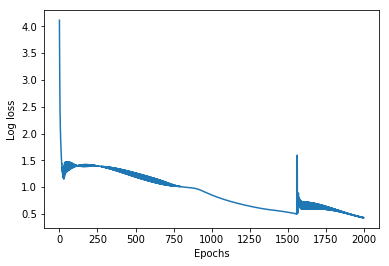

In [12]:
# model.fit(x_train, y_oh_train, epochs=2000, learning_rate=0.5, display_loss=True)

In [13]:
# y_pred_train = model.predict(x_train)
# y_pred_train = np.argmax(y_pred_train, 1)

# y_pred_val = model.predict(x_val)
# y_pred_val = np.argmax(y_pred_val, 1)

# acc_train = accuracy_score(y_pred_train, y_train)
# acc_val = accuracy_score(y_pred_val, y_val)

# print("Training accuracy ", round(acc_train, 2))
# print("Validation accuracy ", round(acc_val, 2))

Training accuracy  0.81
Validation accuracy  0.87


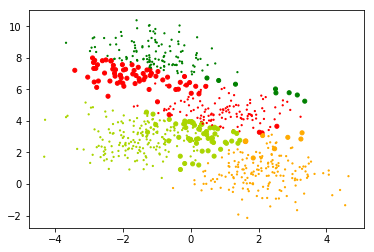

In [14]:
# plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(y_pred_train-y_train))+.1))
# plt.show()

In [8]:
class FFNN2:
    
    def __init__(self, n_inputs, hidden_sizes=[2]):
        self.nx = n_inputs
        self.ny = 4
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        self.W = {}
        self.B = {}

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps, axis=1).reshape(-1, 1)
    
    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
#         print('{} h 0'.format(self.H[0].shape))
        for i in range(self.nh):
#             print('{} h'.format(self.H[i].shape))
#             print('{} w'.format(self.W[i+1].shape))
#             print('{} i'.format(i))
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        self.A[self.nh + 1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh +1]
        self.H[self.nh + 1] = self.softmax(self.A[self.nh + 1])
#         self.A1 = np.matmul(x, self.W1) + self.B1 # (N, 2) * (2, 2) -> (N, 2)
#         self.H1 = self.sigmoid(self.A1) # (N, 2)
#         self.A2 = np.matmul(self.A1, self.W2) + self.B2 # (N, 2) * (2, 4) -> (N, 4)
#         self.H2 = self.softmax(self.A2) # (N, 4)
        return self.H[self.nh + 1]
    
    def grad_sigmoid(self, x):
        return x*(1-x)
    
    def cross_entropy(self, label, pred):
        yl = np.multiply(pred, label)
        yl = yl[yl!=0]
        yl = np.log(yl)
        yl = np.mean(yl)
        return yl
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
        
    def fit(self, X, Y, epochs=100, initialize=True, learning_rate=0.01, display_loss=False):
        if display_loss:
            loss = {}
        if initialize:
            for i in range(self.nh + 1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh + 1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh + 1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
            m = X.shape[0]
            for i in range(self.nh + 1):
                self.W[i+1] -= learning_rate * (dW[i+1]/m)
                self.B[i+1] -= learning_rate * (dB[i+1]/m)
            if display_loss:
                Y_pred = self.predict(X)
                loss[epoch] = log_loss(Y, Y_pred)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('CE')
            plt.show()
    
#     def grad(self, X, Y):
#         self.forward_pass(X)
#         m = X.shape[0]
        
#         self.dA2 = self.H2 - Y # (N, 4) - (N, 4) -> (N, 4)
#         self.dW2 = np.matmul(self.H1.T, self.dA2) # (2, N) * (N, 4) -> (2, 4)
#         self.dB2 = np.sum(self.dA2, axis=0).reshape(1, -1) # (N, 4) -> (1, 4)
#         self.dH1 = np.matmul(self.dA2, self.W2.T) # (N, 4) * (4, 2) -> (N, 2)
#         self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1)) # (N, 2) * (N, 2) -> (N, 2)
#         self.dW1 = np.matmul(X.T, self.dA1) # (2, N) * (N, 2) -> (2, 2)
#         self.dB1 = np.sum(self.dA1, axis=0).reshape(1, -1) # (N, 2) -> (1, 2)
    
#     def fit(self, X, Y, epochs=1, initialize=True, learning_rate=1, display_loss=False):
#         if display_loss:
#             loss = {}
#         for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
#             self.grad(X, Y)
#             m = X.shape[0]
#             self.W2 -= learning_rate * (self.dW2/m)
#             self.B2 -= learning_rate * (self.dB2/m)
#             self.W1 -= learning_rate * (self.dW1/m)
#             self.B1 -= learning_rate * (self.dB1/m)
            
#             if display_loss:
#                 Y_pred = self.predict(X)
#                 loss[epoch] = log_loss(np.argmax(Y, axis=1), Y_pred)
#                 # cross entropy / log loss -> -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
        
#         if display_loss:
#             plt.plot(loss.values())
#             plt.xlabel('Epochs')
#             plt.ylabel('Log loss')
#             plt.show()

    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

In [9]:
net2 = FFNN2(2, [2, 3])

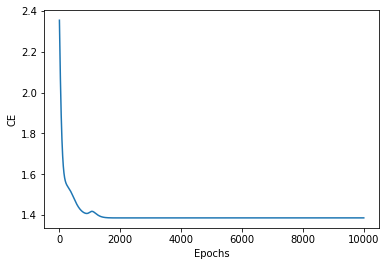

In [11]:
net2.fit(x_train, y_train, epochs=10000, learning_rate=0.005, display_loss=True)

In [12]:
y_pred_train = net2.predict(x_train)
y_pred_train = np.argmax(y_pred_train, 1)

y_pred_val = net2.predict(x_val)
y_pred_val = np.argmax(y_pred_val, 1)

acc_train = accuracy_score(y_pred_train, y_train)
acc_val = accuracy_score(y_pred_val, y_val)

print("Training accuracy", round(acc_train, 2))
print("Validation accuracy", round(acc_val, 2))

Training accuracy 0.45
Validation accuracy 0.45


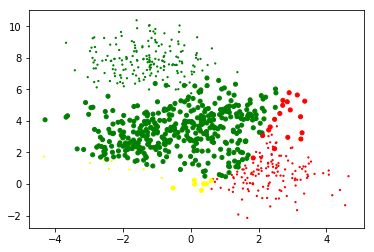

In [13]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(y_pred_train-y_train))+.1))
plt.show()

In [ ]:
net2.fit(x_train, y_train, initialize=False, epochs=10000, learning_rate=0.005, display_loss=True)

In [ ]:
y_pred_train = net2.predict(x_train)
y_pred_train = np.argmax(y_pred_train, 1)

y_pred_val = net2.predict(x_val)
y_pred_val = np.argmax(y_pred_val, 1)

acc_train = accuracy_score(y_pred_train, y_train)
acc_val = accuracy_score(y_pred_val, y_val)

print("Training accuracy", round(acc_train, 2))
print("Validation accuracy", round(acc_val, 2))

plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(y_pred_train-y_train))+.1))
plt.show()